In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import matplotlib.pylab as plt
from arch.unitroot import ADF
from scipy.optimize import curve_fit
from IPython.display import display, Math
from astropy.convolution import convolve, Box1DKernel

import seaborn as sns # gráficas

In [2]:
with open('TN_SOUID119885.txt', 'r') as file:
    lines = file.readlines()
data = [line.strip().split(',') for line in lines]
column_names = ['SOUID', 'DATE', 'TN', 'Q_TN']
df = pd.DataFrame(data, columns=column_names)
df
df = df.astype({'SOUID': int, 'DATE': int, 'TN': int, 'Q_TN': int})
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

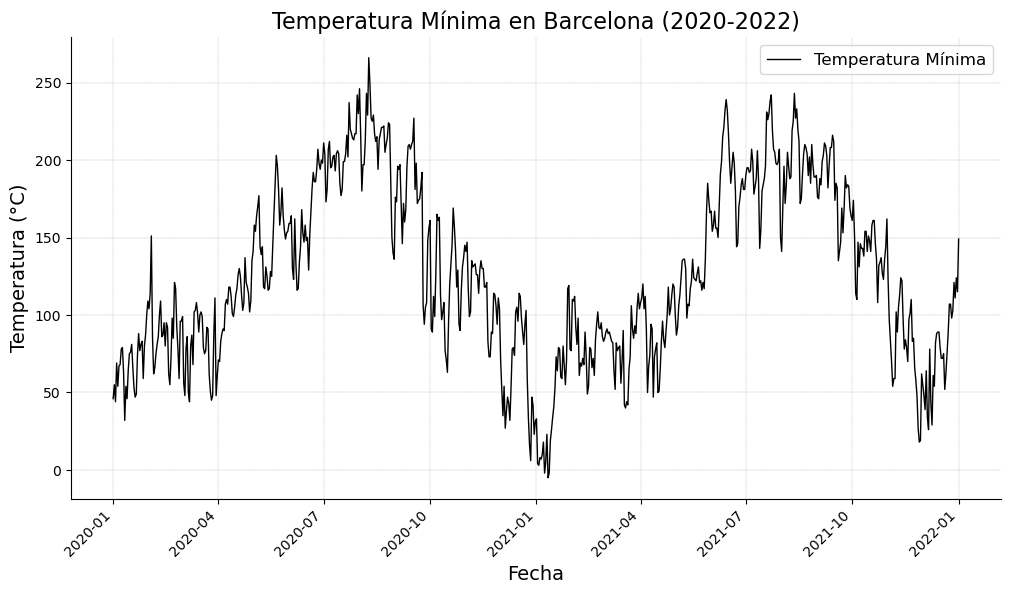

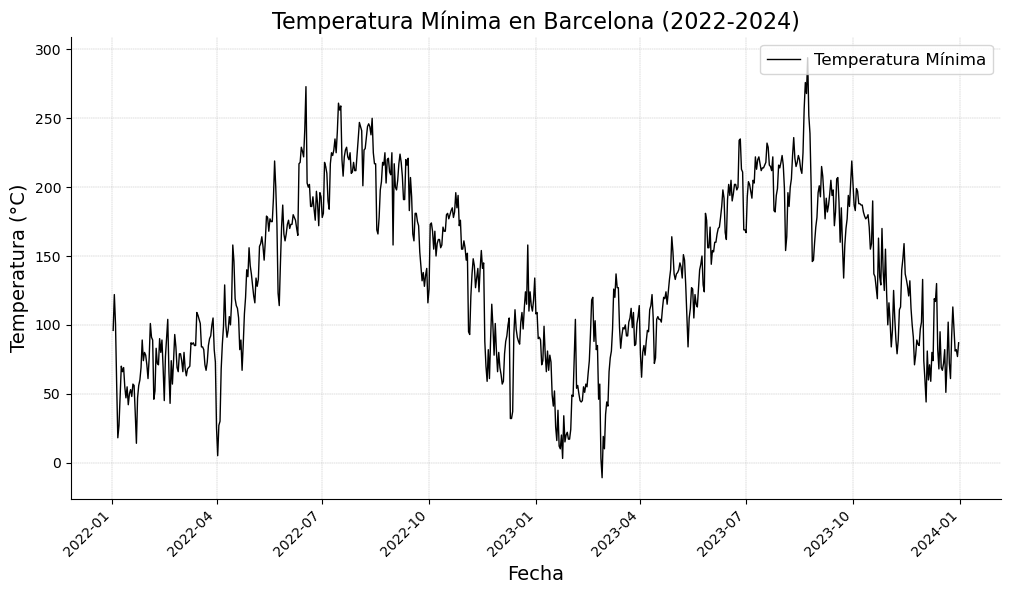

In [3]:
df_train = df[(df["DATE"] >= "2020-01-01") & (df["DATE"] <= "2022-01-01")]
data = df_train

# Tamaño de la figura
plt.figure(figsize=(12, 6))

# Plot de la serie de tiempo con línea negra y más delgada
plt.plot(df_train['DATE'], df_train['TN'], color='black', linewidth=1, label='Temperatura Mínima')

# Títulos y etiquetas con formato
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)
plt.title('Temperatura Mínima en Barcelona (2020-2022)', fontsize=16)

# Líneas de cuadrícula más finas
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

# Formato de las fechas en el eje x
plt.xticks(rotation=45, ha='right')

# Leyenda
plt.legend(loc='upper right', fontsize=12)

# Añadir un marco
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Guardar la figura con alta resolución
plt.savefig('Serie_clima_pron3.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()

df_outsample = df[(df["DATE"] > "2022-01-01")]
data = df_outsample
mid = len(df_outsample )//2

# Tamaño de la figura
plt.figure(figsize=(12, 6))

# Plot de la serie de tiempo con línea negra y más delgada
plt.plot(df_outsample['DATE'], df_outsample['TN'], color='black', linewidth=1, label='Temperatura Mínima')

# Títulos y etiquetas con formato
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)
plt.title('Temperatura Mínima en Barcelona (2022-2024)', fontsize=16)

# Líneas de cuadrícula más finas
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

# Formato de las fechas en el eje x
plt.xticks(rotation=45, ha='right')

# Leyenda
plt.legend(loc='upper right', fontsize=12)

# Añadir un marco
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Guardar la figura con alta resolución
plt.savefig('Serie_clima_pron3.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()

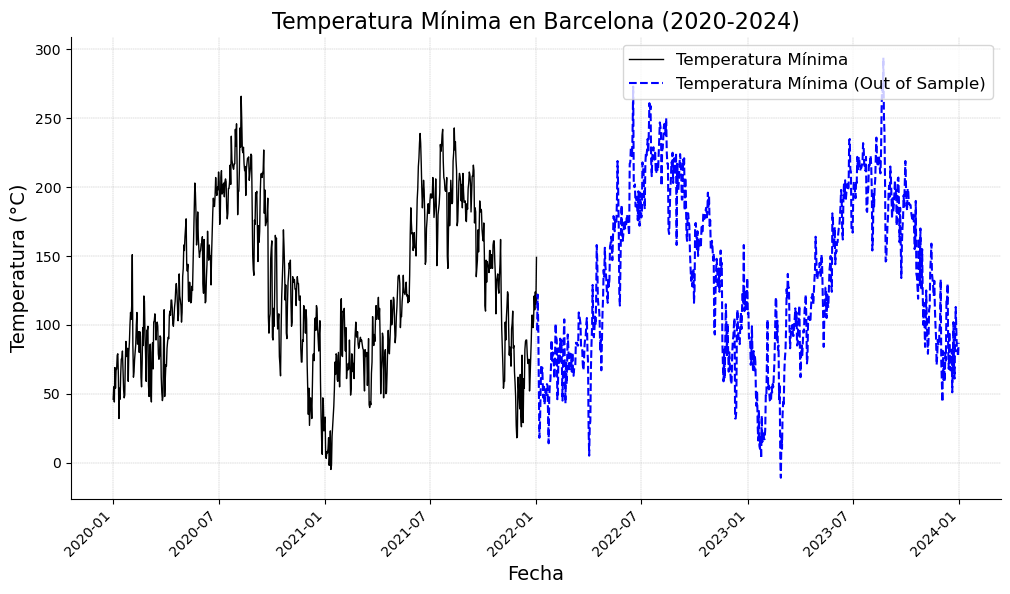

In [4]:
# Tamaño de la figura
plt.figure(figsize=(12, 6))

# Plot de la serie de tiempo con línea negra y más delgada
plt.plot(df_train['DATE'], df_train['TN'], color='black', linewidth=1, label='Temperatura Mínima')
plt.plot(df_outsample['DATE'], df_outsample['TN'], color='blue', linestyle='--', label='Temperatura Mínima (Out of Sample)')

# Títulos y etiquetas con formato
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Temperatura (°C)', fontsize=14)
plt.title('Temperatura Mínima en Barcelona (2020-2024)', fontsize=16)

# Líneas de cuadrícula más finas
plt.grid(True, which='both', linestyle='--', linewidth=0.3)

# Formato de las fechas en el eje x
plt.xticks(rotation=45, ha='right')

# Leyenda
plt.legend(loc='upper right', fontsize=12)

# Añadir un marco
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Guardar la figura con alta resolución
plt.savefig('Serie_clima_pron3.png', dpi=300, bbox_inches='tight')

*   **Augmented Dickey-Fuller (ADF):** test de estacionariedad. Asumiendo $\alpha = 0.05$, se tienen las hipótesis

\begin{align*}
  &\mathcal{H_0}: \quad \text{La serie no es estacionaria} \; (p>\alpha). \\
  &\mathcal{H_A}: \quad \text{La serie es estacionaria} \; (p\leq\alpha).
\end{align*}

*   **Fast Fourier Transform (FFT):** Al aplicar FFT, se convierte una señal en el dominio del tiempo a una representación en el dominio de la frecuencia, lo que permite identificar y analizar las frecuencias presentes en los datos. Esto es especialmente útil cuando se busca detectar patrones cíclicos o armónicos, ya que las formas sinusoidales se manifiestan claramente como picos en el espectro de frecuencia. Esta técnica es eficiente y precisa, facilitando la identificación de las frecuencias dominantes y la caracterización de la naturaleza oscilatoria de los datos.


In [5]:
adf = ADF(df_train['TN'], lags=7)
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.540
P-value                         0.106
Lags                                7
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


c:\Users\aleph\miniconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\aleph\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


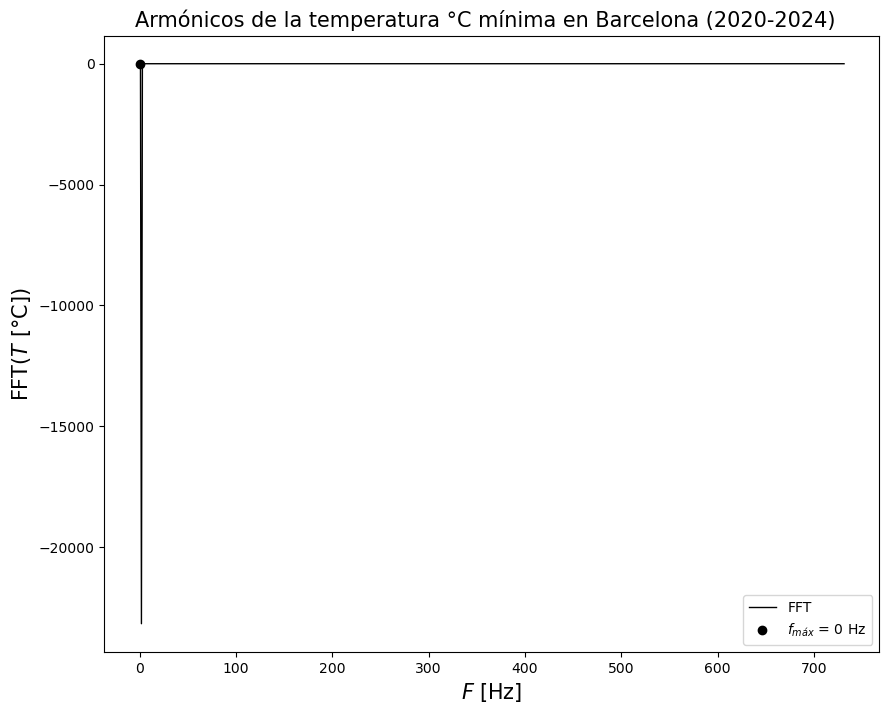

In [6]:
N = len(df_train['TN'])
t = np.linspace(0, 4*np.pi, N)
#Centrar los datos sobre el origen 
data = df_train['TN'] - df_train['TN'].mean()
mfft=np.fft.fft(data)
imax=np.argmax(np.absolute(mfft))
mask=np.zeros_like(mfft)
mask[[imax]]=1
mfft*=mask

fmax, fmax_idx = (np.max(mfft), np.argmax(mfft))

# Crear la figura y el gráfico
plt.figure(figsize=(10,8))
plt.plot(mfft, color='black', linewidth=1,label='FFT')
plt.plot(fmax_idx, fmax, 'o',color='black', label='$f_{máx}$ = ' + str(fmax_idx) + ' Hz')

# Establecer los títulos y etiquetas
plt.xlabel('$F$ [Hz]', fontsize=15)
plt.ylabel('FFT($T$ [°C])', fontsize=15)
plt.title(r'Armónicos de la temperatura °C mínima en Barcelona (2020-2024)  ', fontsize=15)

# Agregar leyenda
plt.legend()
plt.show()

C:\Users\aleph\AppData\Local\Temp\ipykernel_17636\2530942116.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  Tdata = 1 / fmax_idx


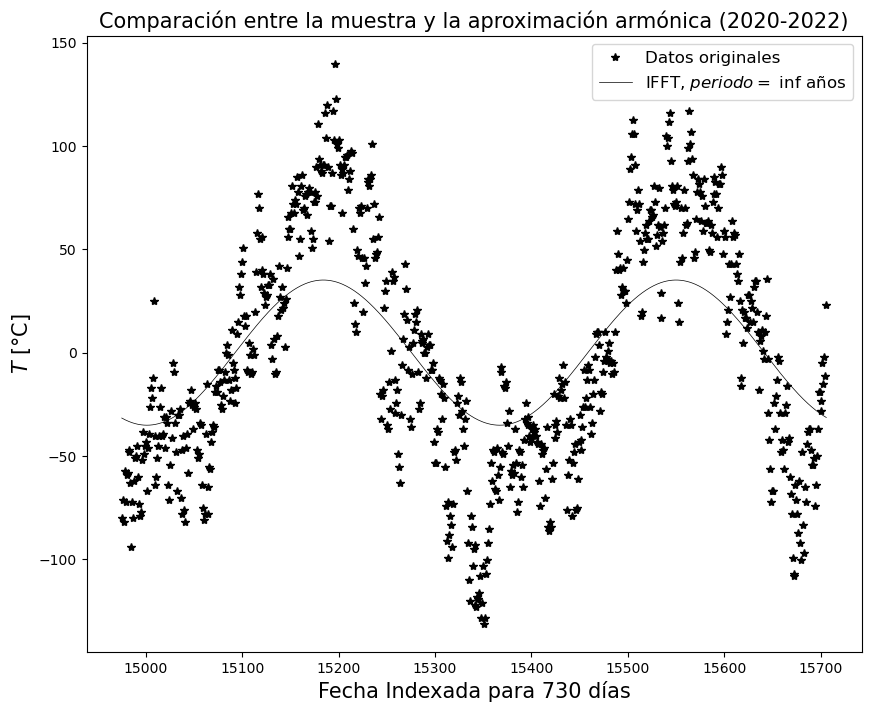

In [7]:

# Realizar la transformada inversa de Fourier
fdata = np.fft.ifft(mfft)
data = pd.Series(df_train["TN"] - df_train["TN"].mean())
fdata = pd.Series(fdata, index=df_train['TN'].index)
Tdata = 1 / fmax_idx

# Crear la figura y el gráfico con la estética armonizada
plt.figure(figsize=(10,8))

# Graficar los datos originales
plt.plot(data, 'k*', label='Datos originales')  # Puntos negros pequeños como asteriscos

# Graficar la transformada inversa de Fourier con la etiqueta adecuada
plt.plot(fdata, 'k-', linewidth=0.5, label='IFFT, $periodo =$ ' + str(round(Tdata, 2)) + ' años')  # Líneas delgadas y negras

# Añadir título y etiquetas de los ejes
title = 'Comparación entre la muestra y la aproximación armónica (2020-2022)'
plt.title(title, fontsize=15)
plt.ylabel('$T$ [°C]', fontsize=15)
plt.xlabel('Fecha Indexada para 730 días', fontsize=15)  # Añadir etiqueta para el eje x

# Añadir leyenda
plt.legend(fontsize=12)

# Mostrar el gráfico
plt.show()

## Estimación de parámetros. $a(t), \kappa, \sigma$

\begin{align}
    \hat{\kappa} &= \frac{\sum_{i=1}^T\bigg[\big(X_i - X_{i-1} - \dot{m}_{i-1} \Delta t\big)\big(m_{i-1} - X_{i-1}\big)\bigg]}{\sum_{i=1}^T\bigg[\big(m_{i-1} - X_{i-1}\big)^2 \Delta t\bigg]}, \\
    \hat{a}(t) &= m(t) + \frac{\dot{m}(t)}{\hat{\kappa}}\\
    \hat{\sigma} &= \sqrt{\frac{1}{T \Delta t}\sum_{i=1}^T\Bigg[X_i - X_{i-1} - \big[\hat{\alpha}\big(m_{i-1}-X_{i-1}\big) + \dot{m}_{i-1}\big]\Delta t\Bigg]^2}
\end{align}


In [8]:

# Estimación de parámetros
# ind enero 2020 15707

p = len(df_train["TN"]) # número de observaciones

dt = 1/p # Delta t

print(f"desfase de fecha {df_train["TN"]}")

mi = convolve(df_train["TN"],kernel=Box1DKernel(30)) # Equivalente a un filtro pasa bajas
mi = pd.Series(mi, index=df_train["TN"].index)
mi_dot = pd.Series(np.zeros(mi.shape), index=mi.index)

num = 0
den = 0

for i in range(1, p-1):
  mi_dot[i+14975] = (2*mi[i+1+14975] - 3*mi[i+14975] + mi[i-1+14975])/dt
  aux = mi[i-1+14975] - df_train["TN"][i-1+14975]

  num += (df_train["TN"][i+14975] - df_train["TN"][i-1+14975] - mi_dot[i-1+14975]*dt)*aux
  den += (mi[i-1+14975] - df_train["TN"][i-1+14975])**2 * dt

kappa_hat = num/den

sum = 0

for i in range(1, p-1):
  aux = mi[i-1+14975] - df_train["TN"][i-1+14975]
  sum += (df_train["TN"][i+14975] - df_train["TN"][i-1+14975] - (kappa_hat*(aux + mi_dot[i-1+14975])*dt))**2

sigma_hat = np.sqrt((1/(p*dt))*sum)

a_hat = mi + mi_dot/kappa_hat

display(Math(r'\hat{\kappa} = ' + str(round(kappa_hat, 2))))
display(Math(r'\hat{\sigma} = ' + str(round(sigma_hat, 2))))

desfase de fecha 14975     46
14976     55
14977     44
14978     69
14979     54
        ... 
15702    121
15703    111
15704    124
15705    115
15706    149
Name: TN, Length: 732, dtype: int32


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
omg = 2*np.pi/p

def Yt(t, mu, A):
  model = mu + A*np.sin(omg*t)
  return model

T = np.linspace(0, p, num = p) # Intervalo equiespaciado de tiempo

print(len(T))
print(len(df_train["TN"]))
mu, A = curve_fit(Yt, T, df_train["TN"].values)[0] # Mínimos cuadrados

a_2hat = pd.Series(Yt(T, mu, A), index=df_train["TN"].index)

aux = 0
num = 0
den = 0
for i in range(1, p-1):
  aux = a_2hat[i-1+14975]-df_train["TN"][i-1+14975]
  num += (df_train["TN"][i+14975]-df_train["TN"][i-1+14975]*aux)
  den += aux**2*dt

kappa_2hat = num/den

aux = 0
sum = 0
for i in range(1, p-1):
  aux = a_2hat[i-1+14975]-df_train["TN"][i-1+14975]
  sum += (df_train["TN"][i+14975]-df_train["TN"][i-1+14975]-kappa_2hat*aux*dt)**2

sigma_2hat = (1/(p*dt))*sum
display(Math(r'\hat{\mu} = ' + str(round(mu, 2))))
display(Math(r'\hat{A} = ' + str(round(A, 2))))
display(Math(r'\hat{\hat{\kappa}} = ' + str(round(kappa_2hat, 2))))
display(Math(r'\hat{\hat{\sigma}} = ' + str(round(sigma_2hat, 2))))

732
732


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

\begin{align*}
  X(t) &= \hat{\hat{a}}(t) + (X(t-1) - \hat{\hat{a}}(t))\exp[-\hat{\hat{\kappa}} \Delta t] + \hat{\hat{\sigma}} \exp[-\hat{\hat{\kappa}} \Delta t] \Delta B_t
\end{align*}

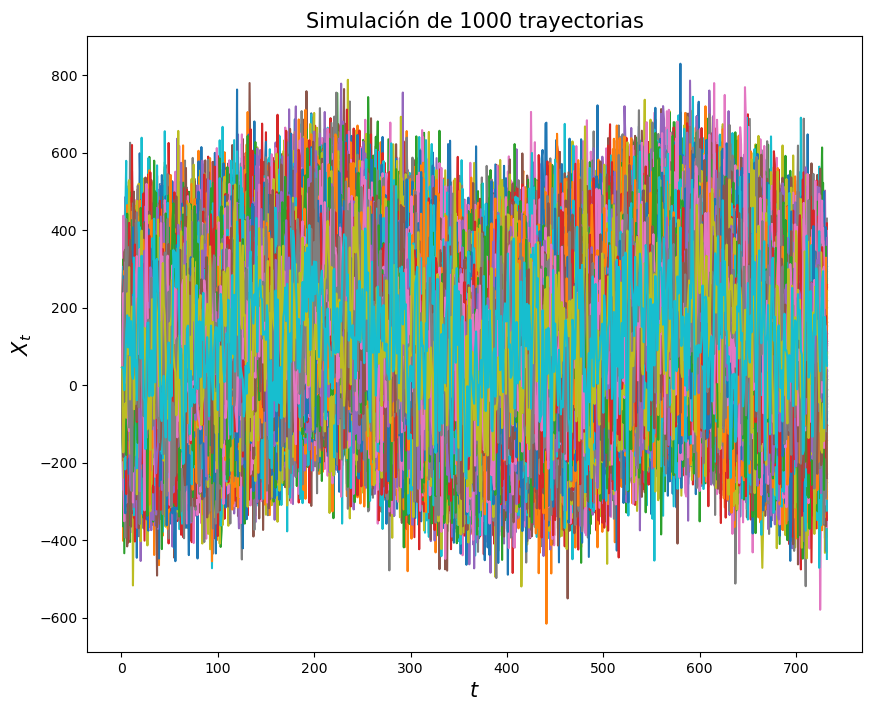

In [10]:
l = 1000 # número de simulaciones
p = len(df_train["TN"]) # número de observaciones

X = np.zeros((l,p))
dt = 1/p # Delta de t de la solución discreta
T = np.linspace(dt, 1, p) 

mu = a_hat
kappa = kappa_2hat
sigma = sigma_hat

x_0 = df_train["TN"][14975] # Valor inicial

plt.figure(figsize=(10,8))
for sim in range(l): # Ciclo de simulaciones
  X[sim,0] = x_0
  for t in range(1, p): # Ciclo de observaciones
    dBt = np.sqrt(dt)*np.random.normal(0,1) # Delta de Bt de la sol. discreta
    # Solución numérica
    X[sim, t] = mu[t+14975] + (X[sim, t-1] - mu[t+14975])*np.exp(-kappa*dt) + sigma*np.exp(-kappa*dt)*dBt
  plt.plot(p*T, X[sim]);

title = 'Simulación de ' + str(l) + r' trayectorias'
plt.title(title, fontsize = 15);
plt.xlabel('$t$', fontsize = 15);
plt.ylabel('$X_t$', fontsize = 15);

<>:42: SyntaxWarning: invalid escape sequence '\h'
<>:42: SyntaxWarning: invalid escape sequence '\h'
C:\Users\aleph\AppData\Local\Temp\ipykernel_17636\1741485797.py:42: SyntaxWarning: invalid escape sequence '\h'
  plt.legend(['Train', 'Test', 'aproximación por media de $\hat{X}$'], fontsize=12)


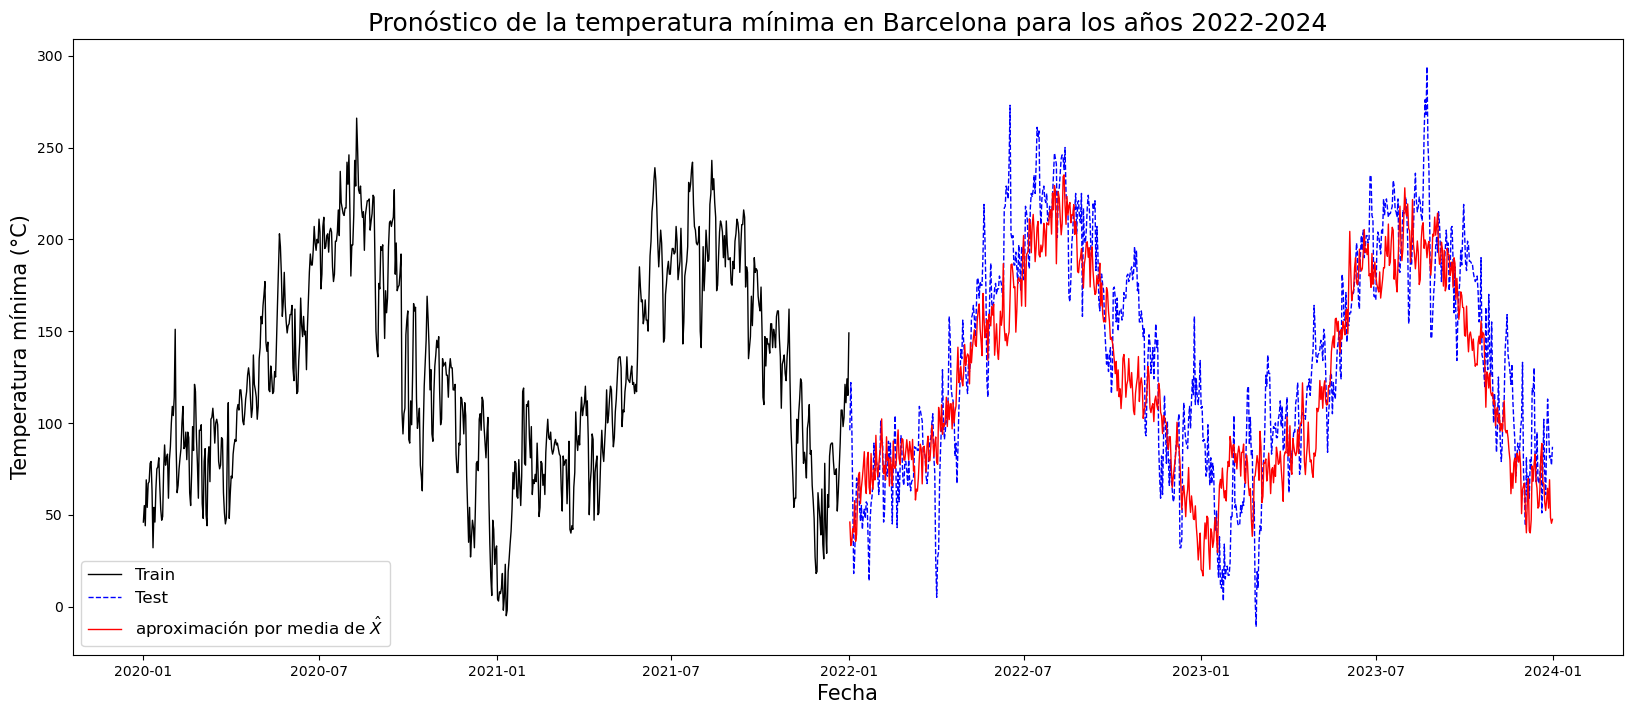

In [11]:
l = 200 # número de simulaciones
p = len(df_outsample["TN"]) # número de observaciones

X_hat = np.zeros((l,p))
dt = 1/p # Delta de t de la solución discreta
T = np.linspace(dt, 1, p) # Intervalo equiespaciado en [0,1]

mu = a_hat
kappa = kappa_2hat
sigma = sigma_hat

x_0 = df_train["TN"][14975]  # Valor inicial

for sim in range(l): # Ciclo de simulaciones
  X_hat[sim,0] = x_0
  for t in range(1, p): # Ciclo de observaciones
    dBt = np.sqrt(dt)*np.random.normal(0,1) # Delta de Bt de la sol. discreta
    # Solución numérica
    X_hat[sim, t] = mu[t+14975-1] + (X_hat[sim, t-1] - mu[t+14975-1])*np.exp(-kappa*dt) + sigma*np.exp(-kappa*dt)*dBt

# Visualizar
fig1 = plt.figure(figsize=(20,8))

# Graficar el set de entrenamiento con línea negra delgada continua
plt.plot(df_train['DATE'], df_train['TN'], color='black', linestyle='-', linewidth=1)

# Graficar el set de prueba con línea azul punteada
plt.plot(df_outsample['DATE'], df_outsample['TN'], color='blue', linestyle='--', linewidth=1)

# Graficar la media de X_hat con línea roja continua
X_hat = pd.DataFrame(X_hat)
X_hat_mean = pd.Series(X_hat.mean(axis=0).values)
plt.plot(df_outsample['DATE'], X_hat_mean, color='red', linestyle='-', linewidth=1)

# Bandas de confianza (opcional)
# X_hat_hi = pd.Series(X_hat.quantile(q=0.55, axis=0).values, index=df_outsample.index)
# X_hat_lo = pd.Series(X_hat.quantile(q=0.45, axis=0).values, index=df_outsample.index)

# Añadir etiquetas y título
plt.ylabel('Temperatura mínima (°C)', fontsize=15)
plt.xlabel('Fecha', fontsize=15)
plt.legend(['Train', 'Test', 'aproximación por media de $\hat{X}$'], fontsize=12)
plt.title("Pronóstico de la temperatura mínima en Barcelona para los años 2022-2024", fontsize=18)

# Mostrar el gráfico
plt.show()



In [23]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

pronostic = pd.Series(X_hat_mean.values, index=df_outsample["TN"].index)
resid1 = df_outsample["TN"] - pronostic

# Función para realizar los tests
def analyze_residuals(residuals, name):
    # Test de independencia (No correlación) usando el test de Ljung-Box
    lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
    
    # Test de media cero
    mean_zero = np.mean(residuals)
    
    # Test de varianza constante (Homoscedasticidad)
    # Vamos a dividir los residuos en dos partes y comparar sus varianzas
    n = len(residuals)
    var1 = np.var(residuals[:n//2])
    var2 = np.var(residuals[n//2:])
    
    print(f"Resultados para {name}:")
    print("-----------------------")
    print(f"Test de Ljung-Box (p-value): {lb_test['lb_pvalue'].values[0]}")
    print(f"Media de los residuos: {mean_zero}")
    print(f"Varianza en la primera mitad: {var1}")
    print(f"Varianza en la segunda mitad: {var2}")
    print("")

# Analizar residuos de data1
analyze_residuals(pronostic, 'pronóstico')

Resultados para pronóstico:
-----------------------
Test de Ljung-Box (p-value): 0.0
Media de los residuos: 124.49483096589334
Varianza en la primera mitad: 2638.54144872954
Varianza en la segunda mitad: 3038.5036503238966



In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan
resid1 = resid1
X = np.arange(len(resid1))
X = sm.add_constant(X)  # Añadir una constante para el intercepto
model = sm.OLS(resid1, X).fit()

# Obtener los valores necesarios para el test de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

# El test devuelve cuatro valores, los más relevantes son:
# bp_test[1]: p-valor del test de Breusch-Pagan
# bp_test[3]: p-valor del test de Koenker (una versión robusta del test de Breusch-Pagan)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

# Interpretación
p_value = bp_test[1]
if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Existe heteroscedasticidad.")
else:
    print("No rechazamos la hipótesis nula. No existe evidencia suficiente de heteroscedasticidad.")

{'LM Statistic': 0.23419402847071646, 'LM-Test p-value': 0.6284313076570454, 'F-Statistic': 0.23362657427543065, 'F-Test p-value': 0.628993254913885}
No rechazamos la hipótesis nula. No existe evidencia suficiente de heteroscedasticidad.
